In [74]:
import nltk
from os import listdir
from os.path import isfile, join
import string
import kalevala_analysis as ka
from matplotlib import pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from scipy.sparse import find
import numpy as np
from sklearn.metrics import pairwise
import pprint

sn.set(style="whitegrid")

In [2]:
poems_list = ka.read_files('data')

In [3]:
cleaned_poems = list(ka.map_with_function(ka.remove_punctuations, poems_list))

In [4]:
poem_lists = ka.combine_and_tokenize_all_poems(cleaned_poems)

In [5]:
metrics=ka.calculate_metrics(poems_list)

In [6]:
metrics_as_arrays=[[name, lines, words] for name, lines, words in metrics]

In [7]:
df=pd.DataFrame(metrics_as_arrays, columns=['poem_name', 'row_count', 'word_count'])

In [8]:
df.head()
df['poem_name']=df['poem_name'].astype('str')

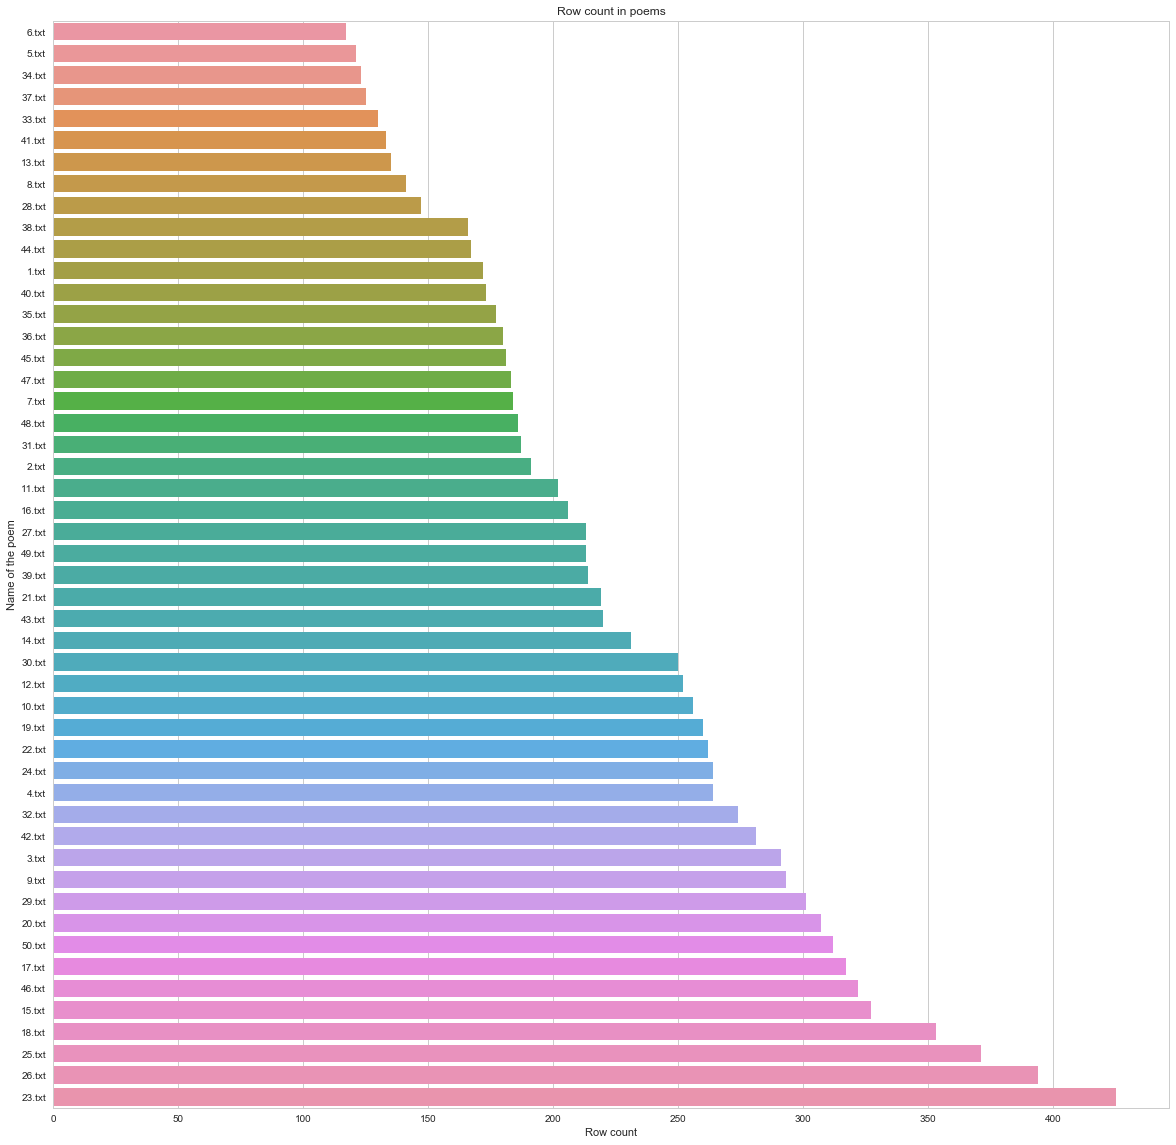

In [9]:
plt.figure(figsize=(20,20))
plotfig=sn.barplot(y='poem_name', x='row_count', data=df.sort_values(by='row_count'))
plt.xlabel('Row count')
plt.ylabel('Name of the poem')
plt.title("Row count in poems")
plt.show(plotfig)


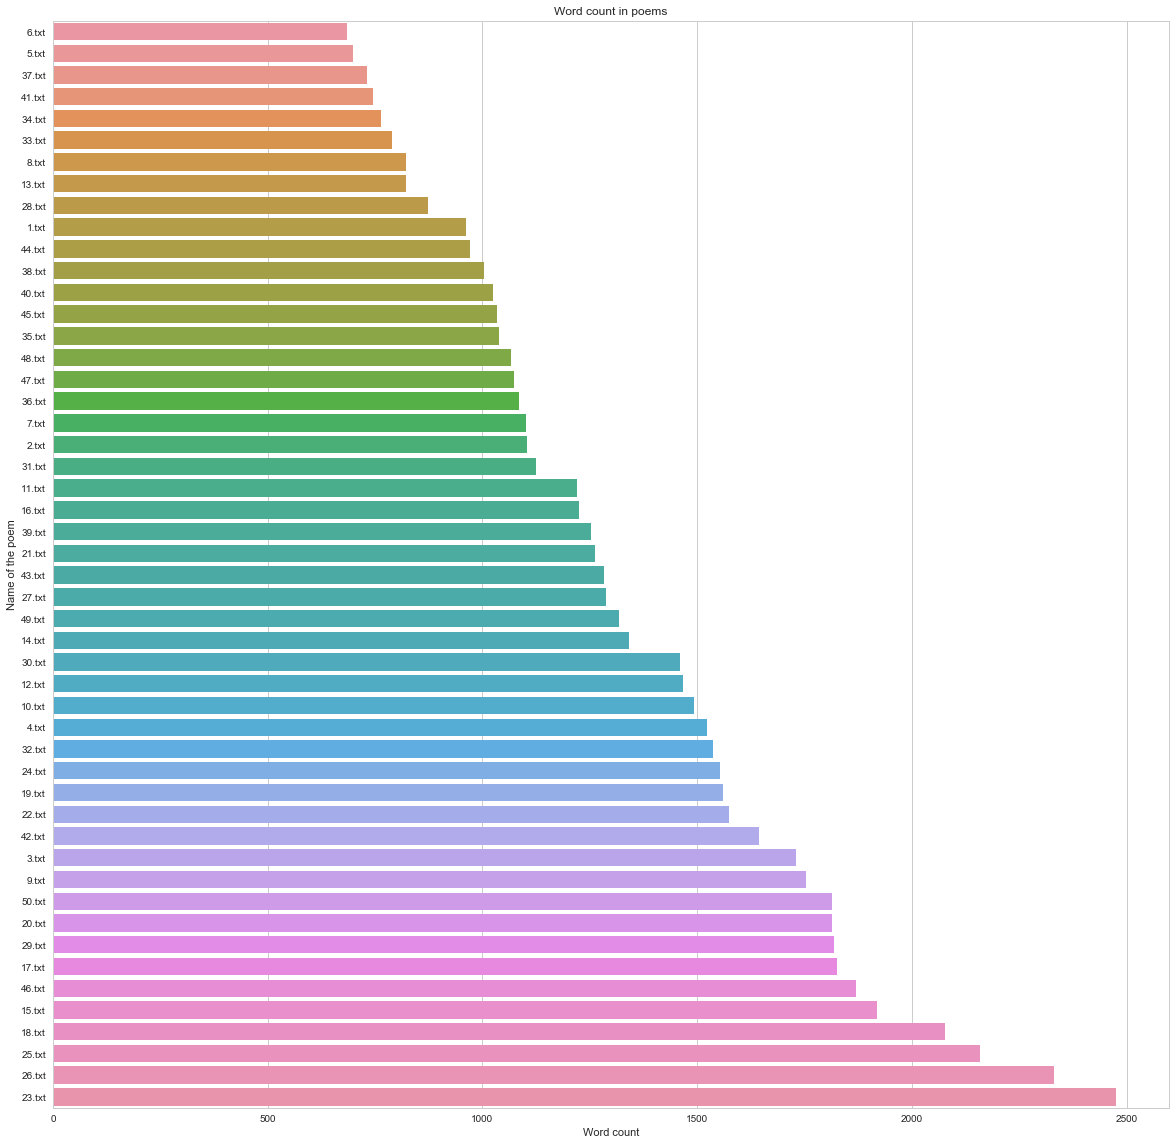

In [10]:
plt.figure(figsize=(20,20))
plotfig=sn.barplot(y='poem_name', x='word_count', data=df.sort_values(by='word_count'))
plt.xlabel('Word count')
plt.ylabel('Name of the poem')
plt.title("Word count in poems")
plt.show(plotfig)

In [11]:
poem_names=np.array([name for name, poem in cleaned_poems])

In [45]:
corpus=map(lambda x: ' '.join(x[1]), cleaned_poems)

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
voc=np.array(vectorizer.get_feature_names())

dense=tfidf.todense()

In [79]:
dist_matrix=pairwise.pairwise_distances(dense.A)

In [81]:
pd.DataFrame(data=dist_matrix, columns=df['poem_name'].unique(), index=df['poem_name'].unique())


,29.txt,15.txt,14.txt,28.txt,16.txt,17.txt,13.txt,12.txt,10.txt,38.txt,...,26.txt,32.txt,33.txt,27.txt,31.txt,25.txt,19.txt,18.txt,24.txt,30.txt
29.txt,0.000000,1.282891,1.286167,1.248702,1.341808,1.338576,1.300464,1.223314,1.339443,1.351163,...,1.201127,1.359125,1.362318,1.207710,1.354428,1.329207,1.335176,1.310450,1.342416,1.260214
15.txt,1.282891,0.000000,1.281413,1.277240,1.307165,1.319819,1.337360,1.263434,1.311865,1.332049,...,1.225657,1.343854,1.353445,1.288061,1.359602,1.336802,1.281521,1.306783,1.349689,1.309074
14.txt,1.286167,1.281413,0.000000,1.309723,1.339423,1.319419,1.255651,1.259608,1.343402,1.342686,...,1.247366,1.282380,1.355870,1.265731,1.368308,1.341062,1.308555,1.334959,1.360559,1.313130
28.txt,1.248702,1.277240,1.309723,0.000000,1.374172,1.360276,1.335673,1.247720,1.352815,1.347216,...,1.216584,1.373928,1.373077,1.245839,1.370786,1.358425,1.359461,1.332201,1.357801,1.292102
16.txt,1.341808,1.307165,1.339423,1.374172,0.000000,1.300956,1.371593,1.340677,1.322656,1.339092,...,1.337531,1.356011,1.362752,1.333097,1.347084,1.335776,1.262606,1.295260,1.374717,1.354757
17.txt,1.338576,1.319819,1.319419,1.360276,1.300956,0.000000,1.343712,1.324216,1.308025,1.328870,...,1.304794,1.342480,1.357130,1.332838,1.362588,1.325096,1.321378,1.316210,1.352070,1.317006
13.txt,1.300464,1.337360,1.255651,1.335673,1.371593,1.343712,0.000000,1.266904,1.357518,1.368076,...,1.288890,1.381271,1.371964,1.291645,1.367609,1.358280,1.365805,1.352877,1.374829,1.328880
12.txt,1.223314,1.263434,1.259608,1.247720,1.340677,1.324216,1.266904,0.000000,1.323508,1.336534,...,1.173372,1.354440,1.357930,1.179090,1.346930,1.335031,1.325148,1.319855,1.343534,1.257631
10.txt,1.339443,1.311865,1.343402,1.352815,1.322656,1.308025,1.357518,1.323508,0.000000,1.137664,...,1.315659,1.362462,1.361602,1.330144,1.344758,1.327227,1.229498,1.210219,1.343488,1.341013
38.txt,1.351163,1.332049,1.342686,1.347216,1.339092,1.328870,1.368076,1.336534,1.137664,0.000000,...,1.304009,1.360884,1.344335,1.312132,1.360128,1.334890,1.243680,1.254809,1.320527,1.340154
